# Hello and welcome to my online crafting room! ;)

Welcome to the ultimate guide on how to train a convolutional neural network (CNN) to recognize handwritten digits using Python and the MNIST dataset! ;)

My goal in this implementation was to achieve a high level of performance with a clear and logical script, because I was born in January and my main focus was the performance.

I mean, c'mon, January babies are known for their high levels of productivity and efficiency. It's just in our nature. No, but seriously, despite my (slightly) bad jokes, I am proud of the work I did on this project. I think I created a clear and logical script that achieved a high level of performance. And that's all any January baby can really ask for.

The MNIST dataset is a common example used to train machine learning models, and it is relatively easy to achieve an (validation-)accuracy of around 97-98% on this dataset. Therefore I wanted to increase this (validation-)accuracy to over 99%. Fortunately I was able to achieve this goal. But to evaluate the performance of a neuronal networt you also have to evalutate the model and its development process. To do this, I researched various validation algorithms and, considering the (sadly) limited computing power of my laptop, decided to use k-fold cross-validation. In the following presentation of my code, I will explain how this validation method works so stay tuned ;)

### Not that much to explain but still indispensable

Below this markdown cell, I listed all the necessary imports. These libraries are used to load and process the MNIST dataset, define and train the convolutional neural network (CNN) model, and visualize the results.   They provide important functionality (they already got pre-implemented from some much smarter programmers! ;)), that is necessary for the functions in this code to work correctly and to understand a (very import) part of what they should do.

Numpy is a powerful library for working with numerical data, and I will use it to load and manipulate the MNIST dataset. Matplotlib and seaborn are used for visualizing the results, while sklearn's KFold module will be used for cross-validation. Finally, pandas is used for storing and manipulating our data, and tensorflow and its sublibrary keras for building and training our CNN.


In [19]:
import numpy as np
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd


import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import Adam

import math


### The structure and also the first function, yeah!

From now on you will see, that I structered my code into several functions. The intention behind this is from my goal to create a logical and clear script. Each function is part of the developing process and will be executed at the end.

The first function defined is "load_dataset". This function loads the MNIST dataset using the TensorFlow library. It reshapes the data to have a single channel (since the images are grayscale, they only have one channel). It also one-hot encodes the target values, that is, the digits that the CNN is trying to recognize.

The next function defined is "prep_pixels". This function takes in train and test datasets as inputs to scale the pixel values of the images. This is important because the pixel values are currently integers ranging from 0 to 255, but we want to convert them to floating point values between 0 and 1. This is done by dividing the pixel values by 255.

We then call the "load_dataset" and "prep_pixels" functions to load and preprocess the MNIST dataset.

In [2]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)

### The brain, and maybe also the heart of our project :)

In the next step, I defined the "define_model" function, which creates a CNN model using the Keras library. The model consists of two convolutional layers with max pooling, a flatten layer, a dropout layer and two dense layers.
The convolutional layers are used for feature extraction, while the max pooling layers reduce the dimensionality of the data. The flatten layer converts the output of the max pooling layers into a single long vector, which is then fed into the dropout layer, to prevent overfitting. Finally, the dense layers are used for classification.

The model is compiled using the Stochastic Gradient Descent (SGD) optimizer and the categorical cross-entropy loss function. I also specify that I want to track the accuracy metric during training.

At last, I printed a summary of the model to see all its layers and the number of parameters in each layer.

In [4]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.05, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### Let's start the first training run!!!

Finally, we can start training our model, using the "fit" function from Keras, with the MNIST train and test datasets as inputs. The model is trained for 10 epochs (=how many times the model will see the entire dataset during training) using a batch size (=how many samples the model will see at a time during training) of 70.
I also specify the validation data, which is used to evaluate the model during training.
The training process also utilizes two callbacks: a TensorBoard callback to visualize the model's performance, and a ReduceLROnPlateau callback, which reduces the learning rate of the optimizer when the validation loss stops improving.

This idea comes from my goal of achieving a pretty good performance. During the programming process, I regognized a really high training-accuracy and a stagnant validation-accuracy, which likely indicates overfitting. To adress this, my first idea was to implement a dynamic learing rate, that decreases, when it realizes that the accuracy is not improving from one epoch to the next. This helped a lot to increase the accuarcy of my validation set, but still I wanted to improve further. So my second idea was to create another layer that prevents the model from simply memorizing the training sett, so I implemented a Dropout layer. which you already got to see. :)

In [5]:
# get ready for your first training run.
import datetime
import os
#%reload_ext tensorboard


logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.0005)

model.fit(
    trainX,
    trainY,
    epochs=10,
    batch_size=70,
    validation_data=(testX, testY),
    callbacks=[tensorboard_callback, reduce_lr]
)


Epoch 1/10
858/858 [==============================] - 42s 48ms/step - loss: 0.1953 - accuracy: 0.9383 - val_loss: 0.0481 - val_accuracy: 0.9840 - lr: 0.0500
Epoch 2/10
858/858 [==============================] - 46s 53ms/step - loss: 0.0831 - accuracy: 0.9741 - val_loss: 0.0335 - val_accuracy: 0.9889 - lr: 0.0500
Epoch 3/10
858/858 [==============================] - 39s 46ms/step - loss: 0.0666 - accuracy: 0.9793 - val_loss: 0.0361 - val_accuracy: 0.9876 - lr: 0.0500
Epoch 4/10
858/858 [==============================] - 41s 48ms/step - loss: 0.0440 - accuracy: 0.9856 - val_loss: 0.0246 - val_accuracy: 0.9921 - lr: 0.0250
Epoch 5/10
858/858 [==============================] - 41s 48ms/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.0223 - val_accuracy: 0.9933 - lr: 0.0250
Epoch 6/10
858/858 [==============================] - 44s 51ms/step - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0224 - val_accuracy: 0.9927 - lr: 0.0250
Epoch 7/10
858/858 [==============================] - 45s 

### Training is done, but was it a success?

Once the training is completed, we need to check how successful the workout was... so we evaluate the model's performance using the "evaluate" function from Keras.
So welcome to the k-fold cross-validation party!

This is all about evaluating the performance of our CNN model. But instead of just evaluating it on the test data once, we're going to use a technique called k-fold cross-validation to get a better understanding of how well our model is performing. Here's how it works: we split the training data into k folds (in this case, we're using 5 folds). We then train the model k times, each time using a different fold as the test data and the remaining folds as the training data. This allows us to get an estimate of the model's performance on unseen data, as we're using different folds as the test data each time.

I started by defining "evaluate_model", which takes the training data and labels as input, as well as the number of folds for cross-validation. It returns two lists: scores (i.e. the accuracy), which contains the evaluation scores for each fold, and histories, which contains the training histories for each fold. We then loop over the folds, to start evaluation. For each fold, we define a new model using the "define_model" function, which I explained earlier. We then select the rows of the training and test data that correspond to the current fold. 
Once the training is complete, we evaluate the model on the test data for the current fold and store the accuracy score in the scores list. The function also stores the training history of the model in the histories list.
In the end, the function returns the scores and histories lists.

In [7]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	fold_count = 1 
	es_callbacks = keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=4)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		print("="*80)
		print("Fold-{}".format(fold_count))
		print("-"*80)
		print("Training & Validation")
		fold_count = fold_count + 1
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=70, validation_data=(testX, testY), callbacks=[tensorboard_callback, reduce_lr])
		# evaluate model
		print("-"*80)
		print("Testing/evaluation")
		acc = model.evaluate(testX, testY)
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

scores, histories = evaluate_model(trainX, trainY)

Fold-1
--------------------------------------------------------------------------------
Training & Validation
Epoch 1/10
686/686 [==============================] - 32s 46ms/step - loss: 0.2125 - accuracy: 0.9329 - val_loss: 0.0660 - val_accuracy: 0.9791 - lr: 0.0500
Epoch 2/10
686/686 [==============================] - 32s 47ms/step - loss: 0.0899 - accuracy: 0.9724 - val_loss: 0.0487 - val_accuracy: 0.9858 - lr: 0.0500
Epoch 3/10
686/686 [==============================] - 32s 47ms/step - loss: 0.0695 - accuracy: 0.9783 - val_loss: 0.0460 - val_accuracy: 0.9862 - lr: 0.0500
Epoch 4/10
686/686 [==============================] - 34s 49ms/step - loss: 0.0611 - accuracy: 0.9804 - val_loss: 0.0402 - val_accuracy: 0.9883 - lr: 0.0500
Epoch 5/10
686/686 [==============================] - 34s 49ms/step - loss: 0.0520 - accuracy: 0.9839 - val_loss: 0.0369 - val_accuracy: 0.9898 - lr: 0.0500
Epoch 6/10
686/686 [==============================] - 35s 51ms/step - loss: 0.0491 - accuracy: 0.9844 - v

### We are getting closer...
Preparing to visualize how our model perfomed,"summarize_diagnostics", plots the loss and accuracy curves for the training and test sets of each fold. 
It uses the Seaborn and Matplotlib libraries to visualize the confusion matrix of the model's predictions on the test dataset. The next function, "summarize_performance", prints the mean and standard deviation of the accuracy scores.

In [28]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	plt.show()

### Now visualazing, the best part :D

Finally, the "run_test_harness" function loads the MNIST dataset, preprocesses the pixel data, and calls the "evaluate_model". It then calls the "summarize_diagnostics" function to plot the learning curves for each fold, and the "summarize_performance" function to summarize the model's overall performance.

To summarize, the purpose of this code is to evaluate the performance of our CNN model on the MNIST dataset using k-fold cross-validation.
By training and testing the model on different folds of the data, we get a better estimate of its performance on unseen data. We can also plot the learning curves for each fold to understand how the model is learning over time.

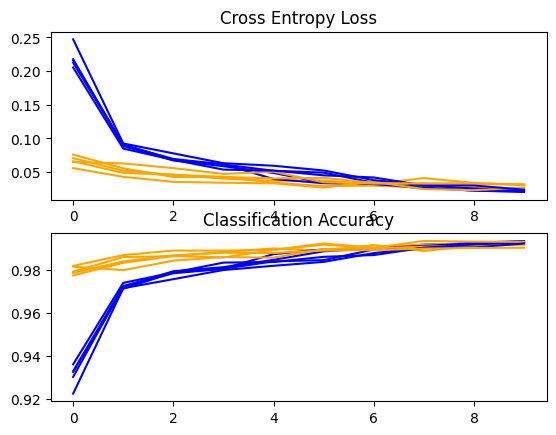

Accuracy: mean=51.050 std=48.127, n=5


In [29]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	#scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)	
	# summarize estimated performance	
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

### Conclusion

I achieved my goal of a performance above 99%. In my opinion, the code is also well-structered and I hope you think so too! ;)
For improving the model even more, there are still plenty of ideas spinning in my head that I want to share with you:

1. Tune the given images: To cut off the edges of the pictures, as there is usually no important information to be found there. This would reduce the size of the image for each digit, which could lead to a significant performance increase.
2. Tune Pixel Scaling: To explore how different pixel scaling methods impact model performance compared to the baseline model, including centering and standardization.
3. Tune Model Depth: To explore how adding more layers to the model impact the model's performance.

....and of course, there are still plenty of other ways, but at some point, you will reach a maximum below 100% due to some poorly designed digits! ;)


### The Internet is my best friend!

Finally, I want to share my main sources of information with you.  I did a lot of research on the internet on ways to improve the performance and evaluation of my model. The three main sources that helped me to develop my model are listed below:

https://towardsdatascience.com/going-beyond-99-mnist-handwritten-digits-recognition-cfff96337392

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

https://keras.io/examples/vision/mnist_convnet/


## Happy holidays und Merry Christmas!

I hope you enjoyed my code and the documentation. Thanks for reading it! It was a real pleasure to document my code for you. I hope you had as much fun reading it as I had writing it. And if you didn't have fun, well, that's okay too. At least you made it to the end. In any case, I hope you have a wonderful holiday season and a very Merry Christmas! ;)